In [13]:
#install liberies

In [4]:
pip install numpy pandas scikit-learn seaborn matplotlib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib


In [1]:
from google.colab import files
uploaded = files.upload()

Saving final_dataset.csv to final_dataset.csv


In [6]:
df = pd.read_csv("final_dataset.csv")
print(df.head())

   daynight_N       lat        lon  fire_weather_index  pressure_mean  \
0         0.0 -15.19928   38.54393            5.654271     955.608333   
1         1.0  31.51203 -101.57546           16.564673     927.016667   
2         1.0 -13.74538   28.05493            5.542089     884.379167   
3         0.0  13.53091  -11.22573            7.703410     981.158333   
4         0.0   5.61833   16.59892           16.895093     917.116667   

   wind_direction_mean  wind_direction_std  solar_radiation_mean  \
0           136.083333           43.611845            250.333333   
1           181.333333           31.925260            296.916667   
2           109.166667            8.379870            210.958333   
3           168.416667          133.287570            244.208333   
4           202.208333           91.791875            266.750000   

   dewpoint_mean  cloud_cover_mean  evapotranspiration_total  humidity_min  \
0      15.883333         18.375000                      4.89          35.0

In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118858 entries, 0 to 118857
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   daynight_N                118858 non-null  float64
 1   lat                       118858 non-null  float64
 2   lon                       118858 non-null  float64
 3   fire_weather_index        118858 non-null  float64
 4   pressure_mean             118858 non-null  float64
 5   wind_direction_mean       118858 non-null  float64
 6   wind_direction_std        118858 non-null  float64
 7   solar_radiation_mean      118858 non-null  float64
 8   dewpoint_mean             118858 non-null  float64
 9   cloud_cover_mean          118858 non-null  float64
 10  evapotranspiration_total  118858 non-null  float64
 11  humidity_min              118858 non-null  float64
 12  temp_mean                 118858 non-null  float64
 13  temp_range                118858 non-null  f

In [8]:
print(df.describe())

          daynight_N            lat            lon  fire_weather_index  \
count  118858.000000  118858.000000  118858.000000       118858.000000   
mean        0.149632       3.650698      20.227071           14.672501   
std         0.356712      25.055919      72.194355           14.316822   
min         0.000000     -51.785000    -158.038040          -16.923297   
25%         0.000000     -14.865982     -12.236832            5.804666   
50%         0.000000      -5.526890      23.755485           10.003812   
75%         0.000000      13.114905      45.504955           17.988127   
max         1.000000      71.230090     179.580090          211.626024   

       pressure_mean  wind_direction_mean  wind_direction_std  \
count  118858.000000        118858.000000       118858.000000   
mean      948.270298           149.199452           59.486299   
std        47.444355            64.516883           43.111548   
min       589.641667             8.916667            1.525250   
25%     

In [9]:
print(df.isna().sum())

daynight_N                  0
lat                         0
lon                         0
fire_weather_index          0
pressure_mean               0
wind_direction_mean         0
wind_direction_std          0
solar_radiation_mean        0
dewpoint_mean               0
cloud_cover_mean            0
evapotranspiration_total    0
humidity_min                0
temp_mean                   0
temp_range                  0
wind_speed_max              0
occured                     0
frp                         0
dtype: int64


In [12]:
#univariate Analysis

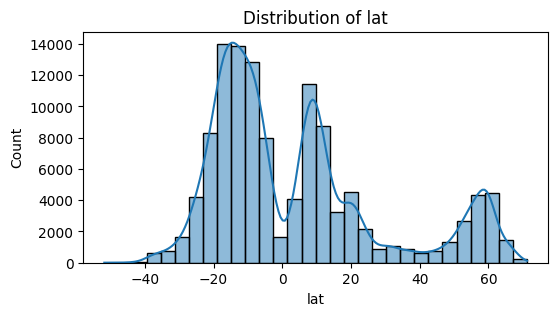

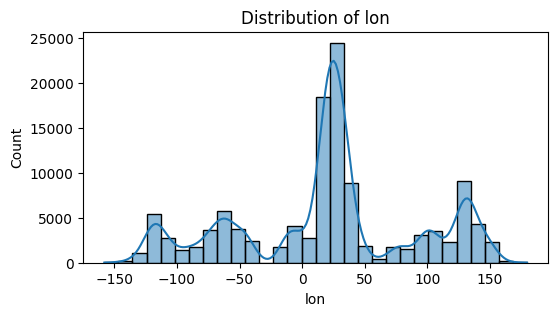

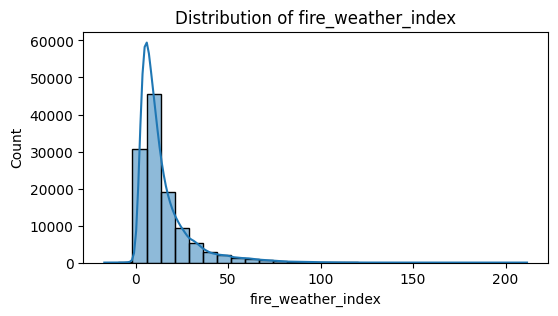

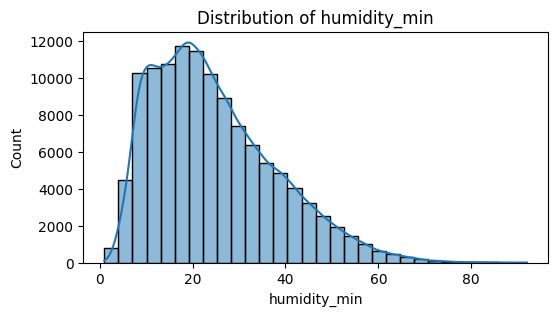

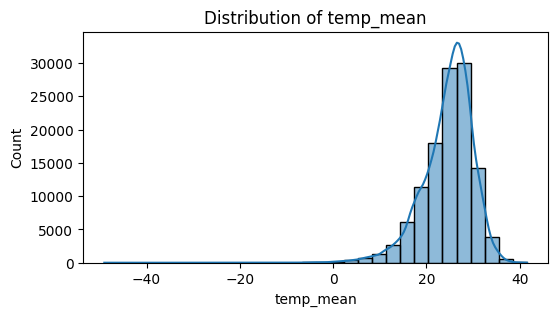

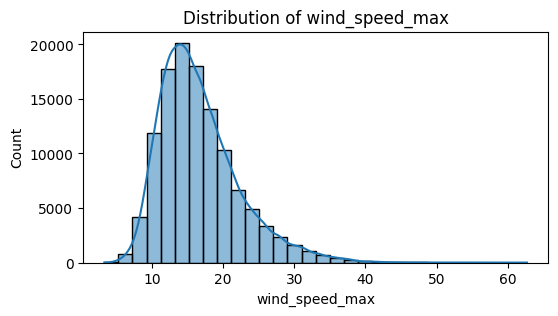

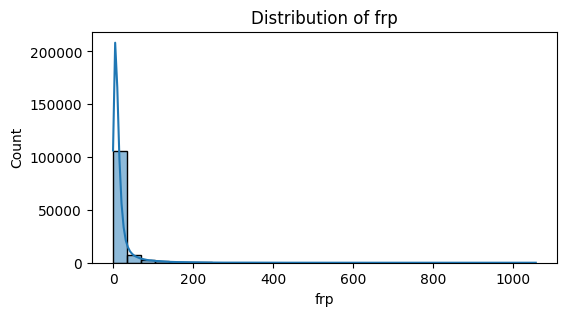

In [10]:
# Select only key features for distribution plots
selected_cols = [
    'lat', 'lon', 'fire_weather_index',
    'humidity_min', 'temp_mean', 'wind_speed_max', 'frp'
]

for col in selected_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


In [11]:
#Bivariate analysis

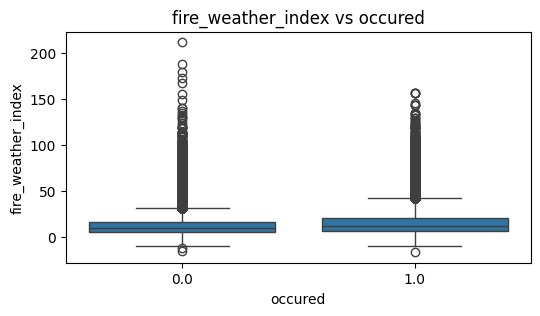

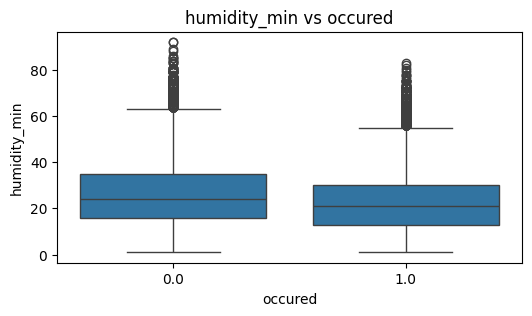

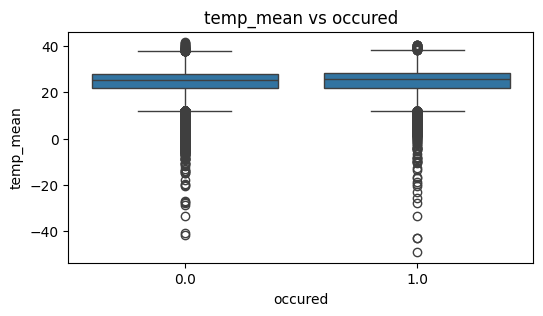

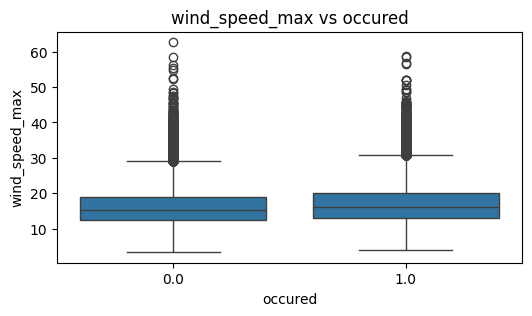

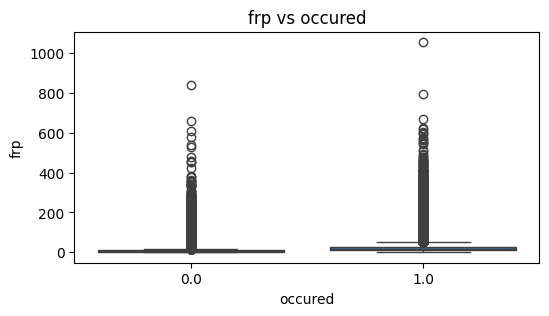

In [14]:

target = 'occured'

selected_cols = [
    'fire_weather_index', 'humidity_min',
    'temp_mean', 'wind_speed_max', 'frp'
]

for col in selected_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs {target}')
    plt.show()


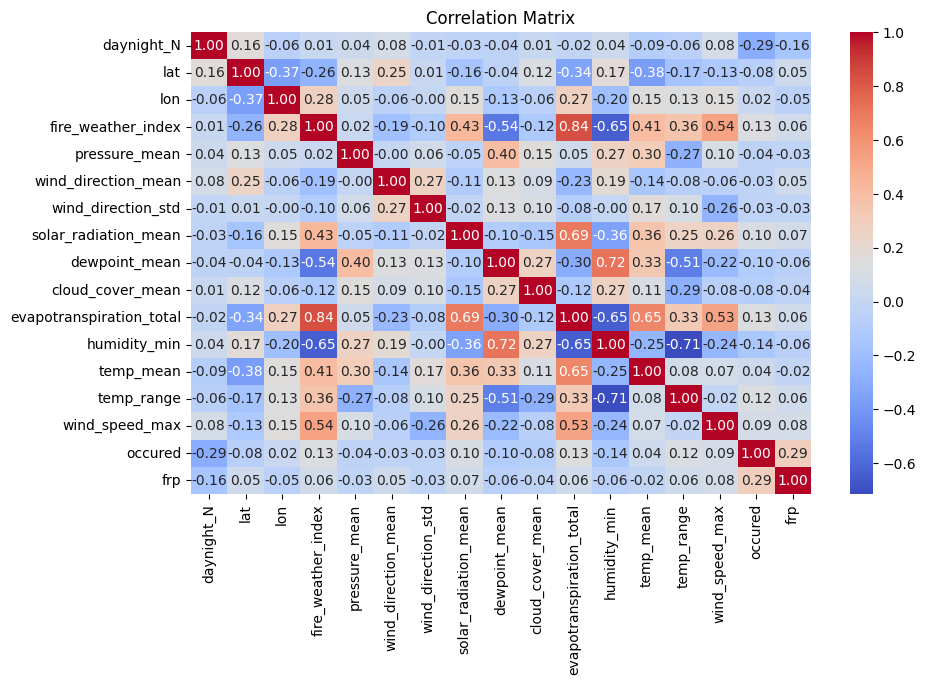

In [15]:
# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


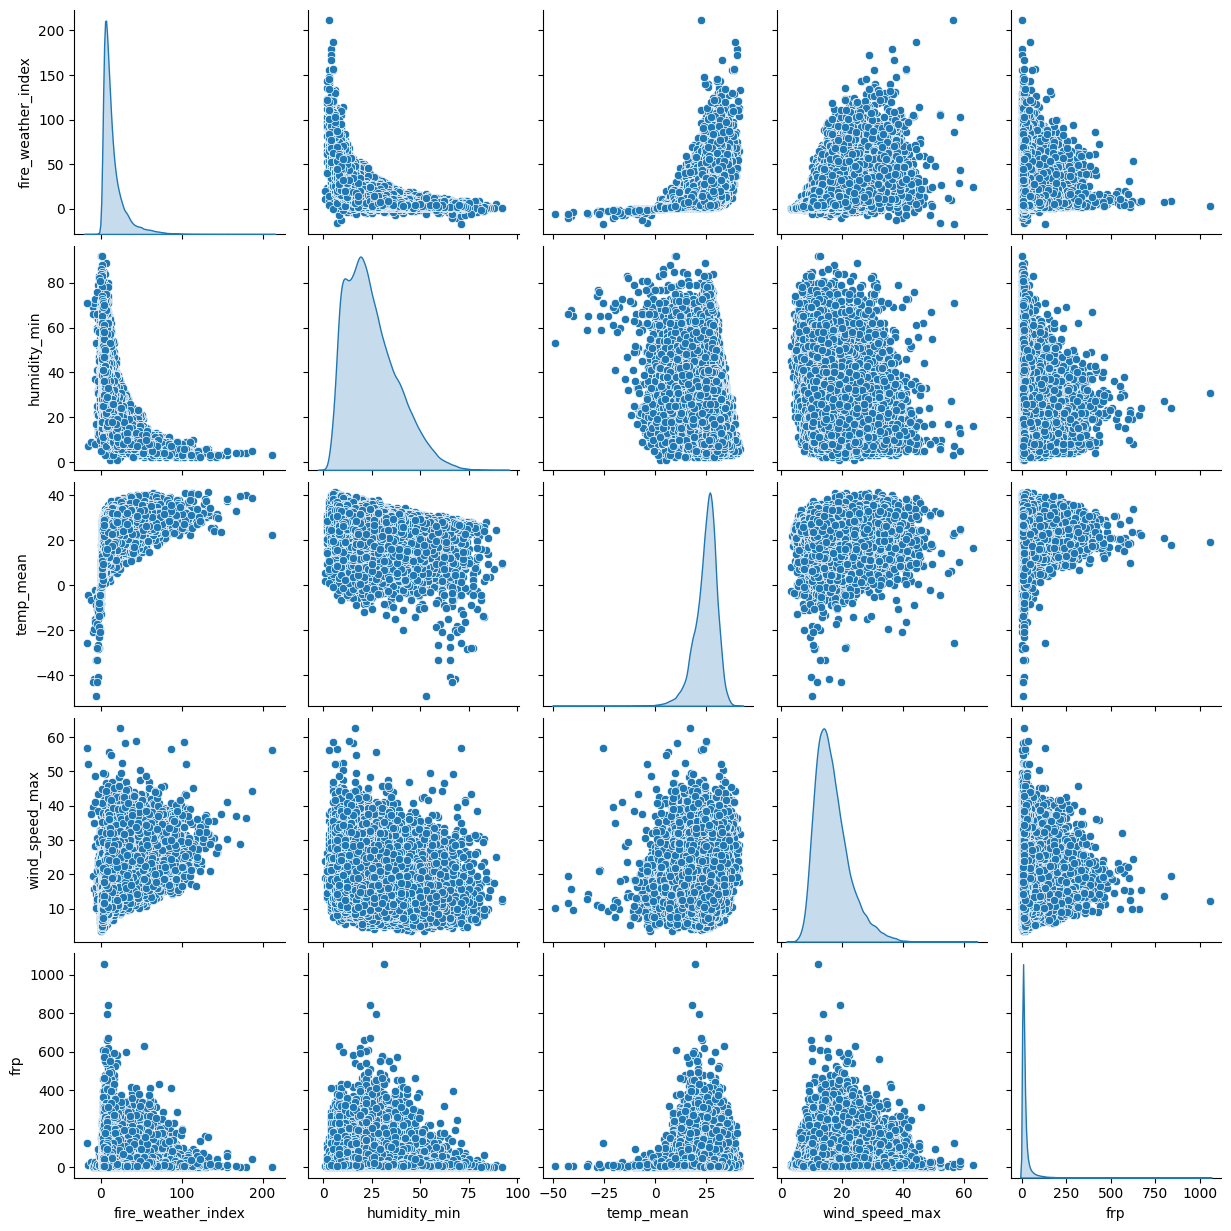

In [16]:
selected_cols = [
    'fire_weather_index', 'humidity_min',
    'temp_mean', 'wind_speed_max', 'frp'
]

sns.pairplot(df[selected_cols], diag_kind="kde")
plt.show()



In [17]:
df.columns

Index(['daynight_N', 'lat', 'lon', 'fire_weather_index', 'pressure_mean',
       'wind_direction_mean', 'wind_direction_std', 'solar_radiation_mean',
       'dewpoint_mean', 'cloud_cover_mean', 'evapotranspiration_total',
       'humidity_min', 'temp_mean', 'temp_range', 'wind_speed_max', 'occured',
       'frp'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



In [19]:
#Data processing

In [20]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index([], dtype='object')


In [21]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [22]:
df['daynight_N'] = df['daynight_N'].astype(int)
df['occured'] = df['occured'].astype(int)   # target


In [23]:
# Feature selection and Target

In [24]:
# Features and Target Selection
X = df.drop(columns=['occured'])   # Features
y = df['occured']                  # Target

print("✅ Features used for training:\n", X.columns.tolist())
print("\n🎯 Target variable:", y.name)


✅ Features used for training:
 ['daynight_N', 'lat', 'lon', 'fire_weather_index', 'pressure_mean', 'wind_direction_mean', 'wind_direction_std', 'solar_radiation_mean', 'dewpoint_mean', 'cloud_cover_mean', 'evapotranspiration_total', 'humidity_min', 'temp_mean', 'temp_range', 'wind_speed_max', 'frp']

🎯 Target variable: occured


In [25]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (95086, 16)
Test set size: (23772, 16)
